In [31]:
#!pip3 install xlrd
#!pip3 install numpy scipy matplotlib ipython jupyter pandas sympy nose seaborn
#!pip install ipympl

     |████████████████████████████████| 55.6 MB 20.0 MB/s            
     |████████████████████████████████| 6.2 MB 25.8 MB/s            
     |████████████████████████████████| 154 kB 33.4 MB/s            
     |████████████████████████████████| 292 kB 26.6 MB/s            
     |████████████████████████████████| 121 kB 16.8 MB/s            
     |████████████████████████████████| 120 kB 18.4 MB/s            
     |████████████████████████████████| 532 kB 17.9 MB/s            
     |████████████████████████████████| 1.6 MB 2.3 MB/s            
     |████████████████████████████████| 243 kB 37.4 MB/s            
     |████████████████████████████████| 65 kB 7.9 MB/s             
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import datetime 
import math
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

sns.set() #sns.reset_orig()
%matplotlib inline

c_path = 'Coefs.csv'
c_df = pd.read_csv(c_path) 

p_path = 'Palmares.csv'
p_df = pd.read_csv(p_path).fillna(0)   



p_df['UCL']= p_df['UCL'].astype(int)
p_df['WC']= p_df['WC'].astype(int)
p_df['EC']= p_df['EC'].astype(int)
p_df['AFC']= p_df['AFC'].astype(int)
p_df['SAC']= p_df['SAC'].astype(int)
p_df['ASC']= p_df['ASC'].astype(int)

p_df['Score']= 1.5 * (c_df.loc[0,'UCL'] * p_df['UCL'] + c_df.loc[0,'WC'] * p_df['WC'] + c_df.loc[0,'EC'] * p_df['EC'] + c_df.loc[0,'SAC'] * p_df['SAC'] + c_df.loc[0,'AFC'] * p_df['AFC'] ) 
p_df = p_df[p_df['Score'] > 0] 
    
    
p_df['BDC']  = pd.to_datetime(p_df['BD'],infer_datetime_format=True)  - datetime.datetime.now() 


## Palyers Ranking

de = p_df.sort_values (by=['BDC','Score'], ascending=True) # sorting on 'BD' first, then on 'Score' 

#p_df_M ['Order'] = p_df_M['Score'].rank(ascending=False,method='first').astype(int)

de['Age'] = -de ['BDC'].dt.days /365#.apply(lambda x: round(x, 2))#.astype(int) # age in days   

pd.options.display.float_format = '{:,.1f}'.format

de = de[['Player','Age','Score'] ]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
# print(p_df_M.to_string(index=False))

de.index = np.arange(1, len(de)+1)
de.head(20)



,Player,Age,Score
1,D. ALVES,39.2,26.2
2,J. FONTE,38.5,4.5
3,G. CHIELLINI,37.9,4.5
4,T. SILVA,37.8,9.8
5,C. RONALDO,37.4,38.2
6,S. MANDANDA,37.3,6.0
7,FERNANDINHO,37.2,3.0
8,L. MODRIC,36.8,33.8
9,J. MILNER,36.5,6.8
10,M. NEUER,36.3,19.5


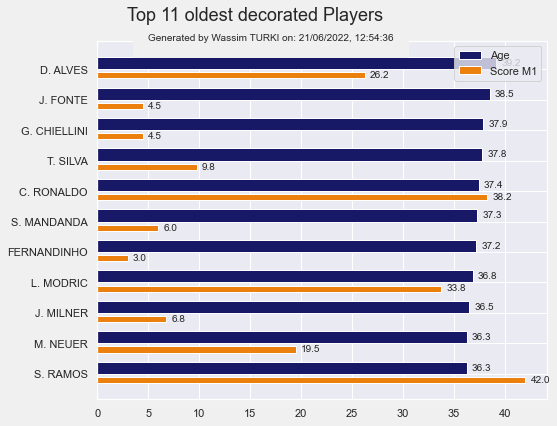

In [8]:
# Vizualization

#df10 = pd.DataFrame(de.head(10))
#ax = df10.plot.bar(x='Player',y='Score')  

de.set_index('Player', inplace=True)
dee = de.head(11).iloc[::-1]

# Variables
first_bar = dee['Age']
first_bar_label = 'Age'
first_bar_color = '#171966'#32628d
second_bar = dee['Score']
second_bar_label = 'Score M1'
second_bar_color = '#eb800e'#e0ac1d
labels = dee.index
width = 0.4  # the width of the bars
plot_title = 'Top 11 oldest decorated Players'
title_size = 18
subtitle = 'Generated by Wassim TURKI on: ' + datetime.datetime.now().strftime("%d/%m/%Y, %H:%M:%S")
filename = 'Players_Age_Score_DESC'


fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
plt.tight_layout()

# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width/2, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#f0f0f0', ec='none'))


# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.1f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)
    
    
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0))


plt.savefig(c_df.loc[0,'Model']+'_'+filename+'.png', facecolor=(.94, .94, .94))
#de.index